## 5-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자

## 목차
[Step1. 사진 모으기](#Step1.-사진-모으기)\
[Step2. 사진 모으기](#Step2.-사진-모으기)\
[Step3. 얼굴 영역의 임베딩 추출하기](#Step3.-얼굴-영역의-임베딩-추출하기)\
[Step4. 모은 그림들과 비교하기](#Step4.-모은-그림들과-비교하기)\
[Step5. 다양한 재미있는 시각화 시도해 보기](#Step5.-다양한-재미있는-시각화-시도해-보기)\
[Rubric](#Rubric)\
[회고](#회고)

#### Library Import

In [1]:
import face_recognition
import os

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img

import numpy as np

print('Library Imported!')

Library Imported!


### Step1. 사진 모으기

#### 1. 내 사진 가져오기

- 내 사진을 2장 이상 포함한다
- 내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 본다

#### 2. 비교할 사진 가져오기
- 많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아질 것이다

file_list: ['shinagawa-hot-tea-1845(1).jpg', 'sharaku-1794-ichikawa-danj-r-vi-as-arakawa-tar-takesada-actually-sazanami-tatsugor.jpg', 'joseph-etienne-roulin-1889.jpg', 'princess-christina-of-saxony.jpg', 'portrait-a-young-venetian.jpg', 'elector-clemens-augustus-of-cologne-1727.jpg', 'madonna-with-st-jerome-and-st-anthony-of-padua-1521.jpg', 'met-dp130249.jpg', 'portrait-of-a-young-woman2.jpg', 'man-laughing-tom-morris-1902.jpg', 'the-tatooed-woman-1894.jpg', 'portrait-of-a-lady-1.jpg', 'kabuki-actors-sanogawa-ichimatsu-ii-as-hayano-kampei-and-osagawa-tsuneyo-as-onoe.jpg', '이죠지.png', 'self-portrait-with-pith-helmet.jpg', 'man-with-a-pink-carnation.jpg', 'stephane-mallarme-1876.jpg', 'self-portrait7.jpg', 'child-in-a-straw-hat-1902.jpg', 'secret-love.jpg', 'portrait-of-a-woman-holding-a-fan.jpg', 'woman-in-the-cafe-tambourin-1887.jpg', 'mademoiselle-beatrice-tapie-de-celeyran-1897.jpg', 'st-matthew.jpg', 'self-portrait-with-bandaged-ear-1889.jpg', 'portrait-of-a-man2.jpg', 'portrait

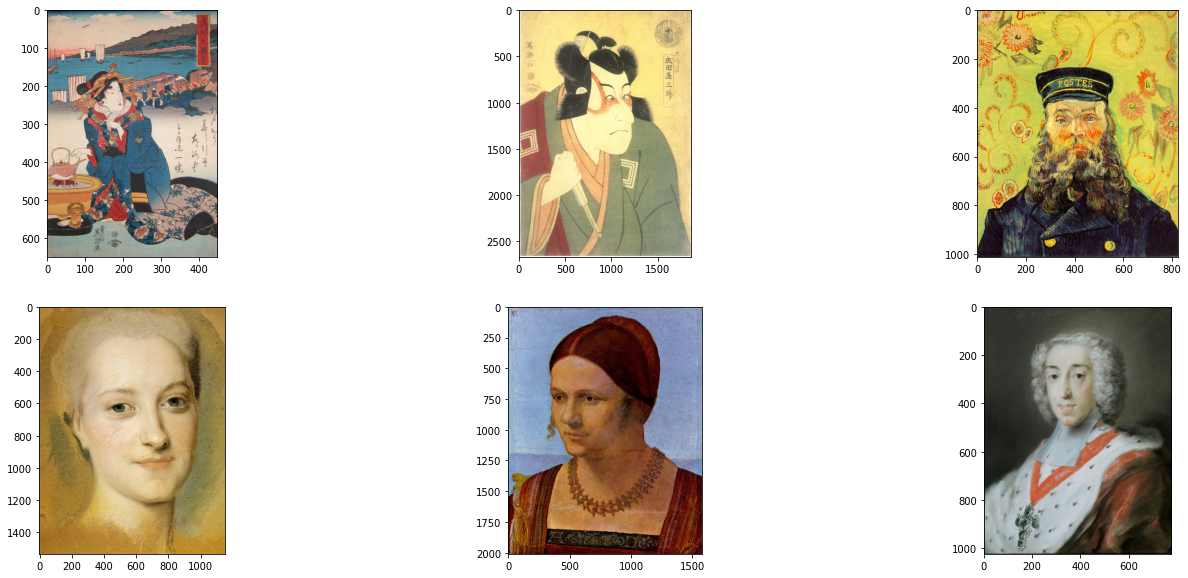

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/image2'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

### Step2. 얼굴 영역 자르기

: 이미지를 불러온 후, 얼굴 영역만 잘라준다

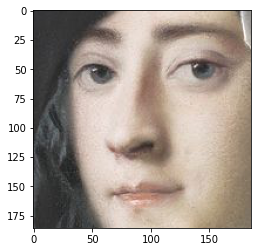

In [3]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/image2/portrait-of-gustavus-hamilton-2nd-viscount-boyne-in-masquerade-costume-1731.jpg'

def get_cropped_face(image_path):
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

image_path = os.getenv('HOME')+'/aiffel/face_embedding/image2/portrait-of-gustavus-hamilton-2nd-viscount-boyne-in-masquerade-costume-1731.jpg'
cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

### Step3. 얼굴 영역의 임베딩 추출하기

image2 디렉토리에 들어있는 이미지 파일들의 리스트

In [4]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/image2/'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['shinagawa-hot-tea-1845(1).jpg', 'sharaku-1794-ichikawa-danj-r-vi-as-arakawa-tar-takesada-actually-sazanami-tatsugor.jpg', 'joseph-etienne-roulin-1889.jpg', 'princess-christina-of-saxony.jpg', 'portrait-a-young-venetian.jpg', 'elector-clemens-augustus-of-cologne-1727.jpg', 'madonna-with-st-jerome-and-st-anthony-of-padua-1521.jpg', 'met-dp130249.jpg', 'portrait-of-a-young-woman2.jpg', 'man-laughing-tom-morris-1902.jpg', 'the-tatooed-woman-1894.jpg', 'portrait-of-a-lady-1.jpg', 'kabuki-actors-sanogawa-ichimatsu-ii-as-hayano-kampei-and-osagawa-tsuneyo-as-onoe.jpg', '이죠지.png', 'self-portrait-with-pith-helmet.jpg', 'man-with-a-pink-carnation.jpg', 'stephane-mallarme-1876.jpg', 'self-portrait7.jpg', 'child-in-a-straw-hat-1902.jpg', 'secret-love.jpg', 'portrait-of-a-woman-holding-a-fan.jpg', 'woman-in-the-cafe-tambourin-1887.jpg', 'mademoiselle-beatrice-tapie-de-celeyran-1897.jpg', 'st-matthew.jpg', 'self-portrait-with-bandaged-ear-1889.jpg', 'portrait-of-a-man2.jpg', 'portrait

#### 얼굴 영역을 통해 얼굴 임베딩 벡터를 구하는 함수의 구현

In [5]:
image_file = os.path.join(dir_path, 'portrait-of-gustavus-hamilton-2nd-viscount-boyne-in-masquerade-costume-1731.jpg')
face = get_cropped_face(image_file)

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08969415,  0.05712475,  0.00301544, -0.06894955, -0.14250714,
        -0.05570513, -0.093189  , -0.11432008,  0.07954796, -0.14848043,
         0.10565276, -0.0338962 , -0.13851146,  0.0671133 , -0.04106005,
         0.18283914, -0.14964972, -0.13257606, -0.08901369, -0.03920465,
         0.01151936,  0.07554504, -0.02093924,  0.12247258, -0.09066793,
        -0.24512511, -0.105496  , -0.06873642,  0.08716512, -0.01304523,
        -0.08887757,  0.00879042, -0.11900667,  0.01775786,  0.08134365,
         0.10128828,  0.00860069, -0.03251642,  0.21534689,  0.02422093,
        -0.19462784,  0.06519485,  0.06445344,  0.26623797,  0.13256103,
         0.03460268,  0.08486913, -0.11708326,  0.10879707, -0.16611947,
         0.03355125,  0.1051397 ,  0.09559192,  0.07165708, -0.01370611,
        -0.15045688,  0.07215048,  0.11967058, -0.19918747,  0.12425061,
         0.14585876, -0.05799031, -0.00980479, -0.03663732,  0.28764921,
         0.08289471, -0.13154267, -0.20456626,  0.1

#### image2 디렉토리 안의 모든 이미지의 임베딩을 구해 `dict` 안에 담아주는 함수의 구현

In [6]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        try:         
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:
            # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
                
        except:
            continue


    return embedding_dict

In [7]:
embedding_dict = get_face_embedding_dict(dir_path)

#### 내 사진들 사이의 거리 구하기

In [8]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [9]:
get_distance('정우일2', '정우일6')

0.2544271597659449

: 내 사진 사이의 거리가 충분히 낮은 것으로 보아 동일한 인물로 인식이 된 것 같다

In [12]:
# name1과 name2의 거리를 비교하는 함수를 생성
# name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('정우일2')   

In [13]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
print('Done!')

Done!


### Step4. 모은 그림들과 비교하기

In [27]:
def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i <= 1 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [28]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('정우일2')

순위 1 : 이름(portrait-of-gustavus-hamilton-2nd-viscount-boyne-in-masquerade-costume-1731), 거리(0.45178137994956036)
순위 2 : 이름(portrait-of-a-young-man-at-prayer), 거리(0.49886188488775274)
순위 3 : 이름(portrait-of-a-young-woman-in-a-red-dress-1775), 거리(0.5060136118806582)
순위 4 : 이름(portrait-of-a-man-of-noble-birth-with-a-book), 거리(0.5109045071744781)
순위 5 : 이름(joanna-of-aragon-1518), 거리(0.5131509035509945)


In [29]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('정우일6')

순위 1 : 이름(portrait-of-gustavus-hamilton-2nd-viscount-boyne-in-masquerade-costume-1731), 거리(0.48059761350614255)
순위 2 : 이름(portrait-of-a-man-of-noble-birth-with-a-book), 거리(0.4918672618206772)
순위 3 : 이름(portrait-of-a-young-man-at-prayer), 거리(0.49498540260564944)
순위 4 : 이름(portrait-of-a-young-girl), 거리(0.5136504036795216)
순위 5 : 이름(portrait-of-a-young-woman-in-a-red-dress-1775), 거리(0.522261949779181)


### Step5. 다양한 재미있는 시각화 시도해 보기

In [31]:
정우일2_path = os.getenv('HOME')+'/aiffel/face_embedding/image2/정우일2.jpg'
정우일2 = img.imread(정우일2_path)

Rank_1_path = os.getenv('HOME')+'/aiffel/face_embedding/image2/portrait-of-gustavus-hamilton-2nd-viscount-boyne-in-masquerade-costume-1731.jpg'
Rank_1 = img.imread(Rank_1_path)

Rank_2_path = os.getenv('HOME')+'/aiffel/face_embedding/image2/portrait-of-a-young-man-at-prayer.jpg'
Rank_2 = img.imread(Rank_2_path)

Rank_3_path = os.getenv('HOME')+'/aiffel/face_embedding/image2/portrait-of-a-young-woman-in-a-red-dress-1775.jpg'
Rank_3 = img.imread(Rank_3_path)

Rank_4_path = os.getenv('HOME')+'/aiffel/face_embedding/image2/portrait-of-a-man-of-noble-birth-with-a-book.jpg'
Rank_4 = img.imread(Rank_4_path)

Rank_5_path = os.getenv('HOME')+'/aiffel/face_embedding/image2/joanna-of-aragon-1518.jpg'
Rank_5 = img.imread(Rank_5_path)

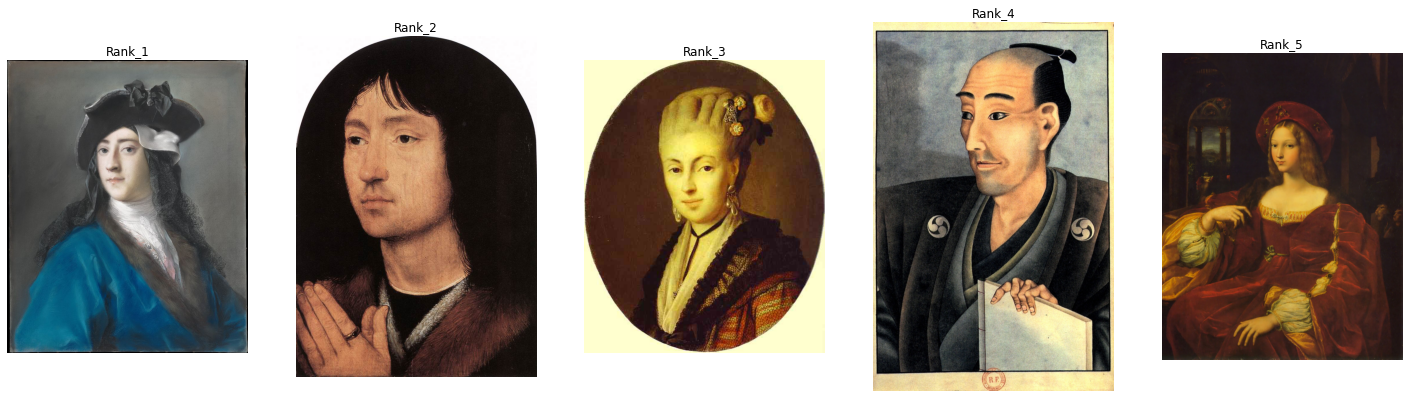

In [32]:
plt.subplots(nrows=1, ncols=5, figsize=(25,10))
plt.subplot(151)
plt.imshow(Rank_1)
plt.axis('off')
plt.title('Rank_1')
plt.subplot(152)
plt.imshow(Rank_2)
plt.axis('off')
plt.title('Rank_2')
plt.subplot(153)
plt.imshow(Rank_3)
plt.axis('off')
plt.title('Rank_3')
plt.subplot(154)
plt.imshow(Rank_4)
plt.axis('off')
plt.title('Rank_4')
plt.subplot(155)
plt.imshow(Rank_5)
plt.axis('off')
plt.title('Rank_5')

fig.tight_layout()

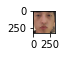

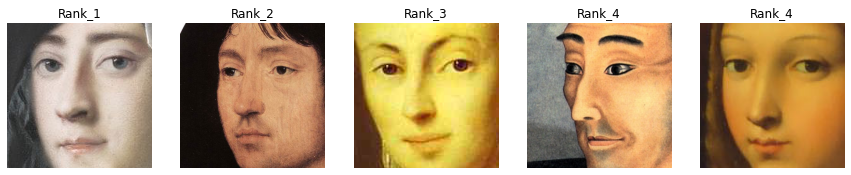

In [33]:
cropped_정우일2 = get_cropped_face(정우일2_path)
plt.subplots(figsize=(0.4,0.4))
plt.imshow(cropped_정우일2)

cropped_Rank_1 = get_cropped_face(Rank_1_path)
cropped_Rank_2 = get_cropped_face(Rank_2_path)
cropped_Rank_3 = get_cropped_face(Rank_3_path)
cropped_Rank_4 = get_cropped_face(Rank_4_path)
cropped_Rank_5 = get_cropped_face(Rank_5_path)

plt.subplots(nrows=1, ncols=5, figsize=(15,15))
plt.subplot(151)
plt.imshow(cropped_Rank_1)
plt.axis('off')
plt.title('Rank_1')
plt.subplot(152)
plt.imshow(cropped_Rank_2)
plt.axis('off')
plt.title('Rank_2')
plt.subplot(153)
plt.imshow(cropped_Rank_3)
plt.axis('off')
plt.title('Rank_3')
plt.subplot(154)
plt.imshow(cropped_Rank_4)
plt.axis('off')
plt.title('Rank_4')
plt.subplot(155)
plt.imshow(cropped_Rank_5)
plt.axis('off')
plt.title('Rank_4')
fig.tight_layout()

실제 사진과 가장 순위가 높았던 5개의 그림을 비교를 했을 때, 사진과 그림들이 크게 부합하지는 않지만, 그림들 간에 가지는 어느 정도의 일관된 특징(얼굴이 정사각형 좌표 상에서 대체로 오른쪽에 위치하고, 왼쪽 얼굴이 정면을 향하는 점)이 보이는 것이 좀 흥미로웠다.

### Rubric

||  <center>**평가 문항**</center> |  <center>**상세 기준**</center> |
|:--------|:--------|:--------|
|**1**|얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.|닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.|
|**2**|충분한 수의 이미지에 대한 시도를 통해매우 닮은꼴의 연예인을 찾아냈다.|다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.|
|**3**|다양하고 재미있는 결과 시각화를 시도하였다.|matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.|

#### 1 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.

: 2개의 사진을 입력했지만, 내 사진들을 제외한 그림들로 이루어진 Best 5를 구하였다.

#### 2 충분한 수의 이미지에 대한 시도를 통해매우 닮은꼴의 연예인을 찾아냈다.
순위 1 : 거리(0.45178137994956036)\
순위 2 : 거리(0.49886188488775274)\
순위 3 : 거리(0.5060136118806582\
순위 4 : 거리(0.5109045071744781)\
순위 5 : 거리(0.5131509035509945)

: 연예인 사진과 비교해서 대체로 그림들은 얼굴 사진과 거리 값은 멀었지만, 임베딩 거리 0.5 이내의 그림을 찾을 수 있었다.

#### 3 다양하고 재미있는 결과 시각화를 시도하였다.

: matplotlib를 이용해 시각화 결과물을 만들었다.

### 회고

처음에는 아지트에 공유된 연예인 사진 데이터를 이용해 프로젝트를 진행했다.
만족스럽지 않은 결과물이 자꾸 나오는데다, 프로젝트를 준비하면서 구했던 초상화 데이터들을 활용하고 싶어(그림 속에서 나의 닮은 꼴을 찾는 것이 더 재미있었다) 초상화 그림 데이터를 활용해 프로젝트를 진행하였다.

923개의 800mb가 넘어 임베딩을 하는 데에 걸리는 시간이 너무 오래 걸리는 점이 진행하는 데에 있어서 가장 큰 고난이었다.

#### 힘들었던 점

`get_face_embedding_dict` 함수를 정의하는 과정에서 디렉토리 내의 이미지 파일을 임베딩을 통해 `dict`에 담을 때 얼굴 영역이 제대로 detect가 되지 않으면 오류가 발생되는 것 때문에 곤란함을 겪었고, 우용님의 도움을 받아 잘 해결할 수 있었다.

또, 임베딩을 무사히 마치고 나서, 내가 준비한 사진에서 꼭 **key error**가 발생하는 경우가 생겼는데, 그걸 제외한 코드에서는 문제가 없었지만 사진을 비교하거나 할 때 곤란한 상황이 발생했다.
한글로 된 이름을 영어로 바꿔 보기도 하고, 새로 파일을 넣어봐도 계속 문제가 발생했는데, 파일 이름을 직접 입력하지 않고, 결과물이나 터미널 상의 이름을 복사해서 넣었을 때는 문제가 생기지 않는 점, 그렇게 가져온 이름을 지우거나 수정할 때, 문자가 겹쳐있는 것으로 인식이 되는 문제(화살표로 이동 시 자음+모음 갯수만큼 방향키를 눌러줘야 이동한다거나 문자를 지울 때 한번에 안 지워지고 자음이 꼭 하나씩 남는다던가 하는 문제가 발생했다. (문자 인코딩의 문제가 아닌가 했지만, 정확하게는 알 수 없었다.)

#### 느낀 점

작사가 노드에서도 느꼈지만, 어떤 결과물을 직접 만들어 내는 것보다 어떤 입력을 넣고 내가 예상할 수 없는 결과물을 보게 되는 점이 재미있었다.

캠퍼스의 다른 분들의 얼굴을 여럿 넣었을 때는 사람들끼리 서로 닮았다고 나오는 경우가 많았는데, 내 얼굴을 넣었을 때는 내 사진을 제외하고는 그림만 매칭이 되어, 나에게 더 맞는 맞춤형 데이터들을 잘 찾은 게 아닌가 생각되었다.

데이터 시각화 자료를 더 재밌게 많이 만들고 싶었지만, 표현의 한계, 아이디어의 부족으로 만들지 못한 점이 안타까웠다.